### Описание данных:

Датасет **telecom_dataset.csv** содержит колонки:  
`user_id` — Идентификатор клиентского аккаунта в сервисе  
`date` — Дата статистики  
`direction` — Направление вызовов (out - исходящий вызов, in— входящий вызов)  
`internal` — Является ли звонок внутренним звонком между операторами клиента   
`operator_id` — Идентификатор оператора  
`is_missed_call` — Является ли звонок пропущенным  
`calls_count` — Количество звонков  
`call_duration` — Длительность звонка (без учета времени ожидания)  
`total_call_duration` — Длительность звонка (с учетом времени ожидания) 

Датасет **telecom_clients.csv** содержит колонки:  
`user_id` — Идентификатор клиентского аккаунта в сервисе  
`tariff_plan` — Текущий тарифный план клиента  
`date_start` — Дата регистрации клиентв в сервисе  

**Правила формирования тарифов:**

`Базовая стоимость тарифного плана A` — 5000 условных единиц  
`Базовая стоимость тарифного плана B` — 2000 условных единиц  
`Базовая стоимость тарифного плана C` — 1000 условных единиц  
`Входящие звонки на всех тарифах` — бесплатные  
`Внутренние звонки на всех тарифах` — бесплатные до 2000 минут разговоров в месяц, после чего тарифицируются:

`Тарифный план A` — 0.1 условных единиц за минуту  
`Тарифный план B` — 0.15 условных единиц за минуту  
`Тарифный план C` — 0.3 условных единиц за минуту  

Исходящие (не внутренние) звонки:  
`Тарифный план A` — 0.4 условных единиц за минуту  
`Тарифный план B` — 0.5 условных единиц за минуту  
`Тарифный план C` — 0.7 условных единиц за минуту  

За каждого оператора клиент платит 100 условных единиц на любом тарифе дополнительно к базовой стоимости тарифного плана и тарификации за звонки.


### Этапы проекта:

1. [Шаг 1. Знакомство с данными](#1)  
    1.Импорт необходимых библиотек  
    2.Загрузка и первичное знакомство с данными  
2. [Шаг 2. Предобработка](#2)  
    1.[Приведение к нужным типап данных](#sub_2_1)  
    2.[Проверка данных на корректность](#sub_2_2)  
    3.[Проверка пропусков](#sub_2_3)  
    4.[Проверка на дубликаты](#sub_2_4)  
    5.[Проверка на выбросы](#sub_2_5)  
3. [Шаг 3. Исследовательский анализ данных](#3)  
    1.[Определим активных клиентов](#sub_3_1)     
    2.[ Количество клиентов разных тарифов в месяц](#sub_3_2)    
    3.[Продолжительность и количество звонков в месяц](#sub_3_3)    
    4.[Количество входящих звонков и исходящих звонков в месяц](#sub_3_4)    
    5.[Количество внутренних и  внешних звонков в месяц](#sub_3_5)  
    6.[Количество пропущенных и отвеченных звонков в месяц](#sub_3_6)  
    7.[Средняя продолжительность звонка в день](#sub_3_7)  
    8.[Количество звонков вдень](#sub_3_8)
4. [Шаг 4. Поиск клиентов, которые переплачивают](#4)    
    1.[Внутренние звонки](#sub_4_1)     
    2.[Расчет выгодных лимитов для тарифов](#sub_4_2)    
    3.[Проверка клиентов тарифа С на переплату](#sub_4_3)    
    4.[Проверка клиентов тарифа В на переплату](#sub_4_4)    
    5.[Проверка клиентов тарифа А на переплату](#sub_4_5)  
    6.[Распределение продолжительности исходящих звонков в месяц](#sub_4_6)
5. [Вывод](#5)

### Шаг 1. Знакомство с данными  <a name="1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%config IPCompleter.greedy=True

In [2]:
clients = pd.read_csv('telecom_clients.csv')

In [3]:
data = pd.read_csv('telecom_dataset.csv')

In [4]:
display(clients.head())
display(clients.info())

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


None

Датасет состоит из 3 столбцов и 732 строк. Пропусков нет. Столбец `date_start` необходимо будет привести к типу данных datetime.

In [5]:
display(data.head())
display(data.info())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


None

Датасет состоит из 9 столбцов и 53902 строк. Есть пропуски в столбцах `internal` и `operator_id`. Столбец `date` необходимо будет привести к типу данных datetime.

### Шаг 2. Предобработка <a name="2"></a>

#### 2.1 Приведение к нужным типап данных. <a name="sub_2_1"></a>

Приведем столбцы с датой к типу **datetime**.

In [6]:
clients['date_start'] = pd.to_datetime(clients['date_start'])
data['date'] = pd.to_datetime(data['date'])

#### 2.2 Проверка данных на корректность. <a name="sub_2_2"></a>

Проверим данные на корректность. 

Выделим пропущенные звонки с продолжительностью больше нуля.

In [7]:
data[(data['is_missed_call']==True) & (data['call_duration'] > 0)].head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1606,166405,2019-11-19 00:00:00+03:00,in,False,939478.0,True,1,165,173
1635,166405,2019-11-21 00:00:00+03:00,in,False,882686.0,True,1,1,5
1657,166405,2019-11-22 00:00:00+03:00,in,False,882686.0,True,1,1,5


Такие звонки явно нельзя назвать пропущенными, вероятно произошел сбой автоматики. Пометим данные строки как непропущенные звонки.

In [8]:
data.loc[(data['is_missed_call']==True) & (data['call_duration'] > 0), 'is_missed_call'] = False

Теперь сделаем проверку наоборот: выделим непропущенные звонки с продолжительностью равной нулю и пометим данные строки как пропущенные.

In [9]:
display(data[(data['is_missed_call']==False) & (data['call_duration'] == 0)].head(3))
data.loc[(data['is_missed_call']==False) & (data['call_duration'] == 0), 'is_missed_call'] = True

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
1552,166405,2019-11-16 00:00:00+03:00,out,False,902532.0,False,1,0,27
1560,166405,2019-11-16 00:00:00+03:00,out,False,902532.0,False,1,0,27
2931,166485,2019-09-03 00:00:00+03:00,out,True,887276.0,False,1,0,4


#### 2.3 Проверка пропусков. <a name="sub_2_3"></a> 1 

В столбце `operator_id`  8172 пропуска.

In [10]:
data[(data['operator_id'].isnull())]['direction'].count()

8172

Посмотрим на природу этих пропусков: вероятно это входящие пропущенные вызовы. В таком случае оператор не был назначен и в базе появился пропуск. Сделаем срез по таким данным.

In [11]:
data[(data['is_missed_call']==True) & (data['direction']=='in')]['direction'].count()

8342

Количество строк практически одинаковое, наше предположение подтвердилось. К сожалению, данные пропуски не представляется возможным заполнить из-за отсутствия фактической информации об операторе. Оставим их как есть.

Так же у нас есть 117 пропусков в столбце `internal`. Почему направление вызова не определилось - неизвестно, также мы не можем заполнить данные пропуски. Удалим данные строки.

In [12]:
data = data.drop((data[data['internal'].isna()]).index)

#### 2.4 Проверка на дубликаты. <a name="sub_2_4"></a> 

Посчитаем количество полных дубликатов в таблице с данными и дубликаты в таблице с клиентами.

In [13]:
display(data.duplicated().sum())

clients.duplicated('user_id').sum()

4893

0

В таблице с данными у нас 4893 полных дубликата. Удалим их.

In [14]:
data = data.drop_duplicates()

#### 2.5 Проверка на выбросы. <a name="sub_2_5"></a> 

Проверим столбцы с количеством звонков и их продолжительностью на выбросы. Для этого построим диаграмму размаха.

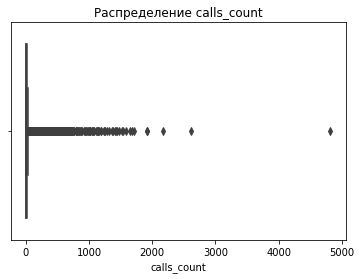

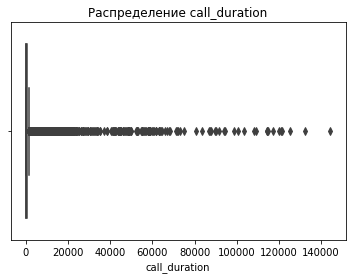

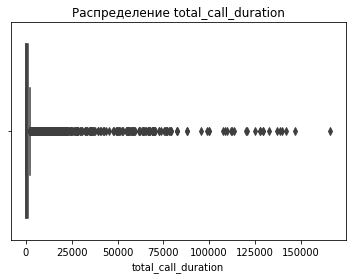

In [15]:
for column in ['calls_count', 'call_duration',
       'total_call_duration']:
    sns.boxplot(x=column, data=data)
    plt.title('Распределение ' + column)
    plt.show()

Наблюдаем большое количество выбросов до нереальных значений. Рассчитаем 95 и 99 процентиль.

In [16]:
data.describe(percentiles = [.95, .99])

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,48892.000000,41491.000000,48892.000000,48892.000000,48892.000000
mean,167294.492841,916516.771155,16.495214,868.088788,1158.976458
std,598.675508,21234.081589,63.671633,3779.549967,4456.180933
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
50%,167158.000000,913938.000000,4.000000,37.000000,210.000000
95%,168271.000000,951508.000000,62.000000,3730.450000,4538.350000
99%,168412.000000,962658.000000,165.090000,10324.900000,12969.990000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


Максимальные значение для 99 процентиля выглядят реалистично. Сделаем срез по 99 процентилю.

In [17]:
calls_count_99 = np.percentile(data['calls_count'], 99)
call_duration_99 = np.percentile(data['call_duration'], 99)
total_call_duration_99 = np.percentile(data['total_call_duration'], 99)

In [18]:
clean_data = (data.query('calls_count <= @calls_count_99 & \
                          call_duration <= @call_duration_99 & \
                          total_call_duration <= @total_call_duration_99') ).copy()

Посмотрим сколько данных мы потеряли, убрав выбросы.

In [19]:
(1 - clean_data.shape[0] / data.shape[0]) * 100

1.5933076986009986

~1.6% данных, что вполне приемлимо.

### ШАГ 3. Исследовательский анализ данных. <a name="3"></a>

#### 3.1 Определим активных клиентов. <a name="sub_3_1"></a> 

Посмотрим сколько клиентов зарегистрировано в сервисе и по скольким клиентам есть данные.

In [20]:
display(clients.user_id.nunique())
clean_data.user_id.nunique()

732

307

По 425 клиентам нет никаких данных, вероятно они не проявили никакой активности.

Посмотрим за какой период у нас данные.

In [21]:
clean_data.groupby('date')[['calls_count']].sum()

,calls_count
date,
2019-08-02 00:00:00+03:00,21
2019-08-03 00:00:00+03:00,29
2019-08-04 00:00:00+03:00,6
2019-08-05 00:00:00+03:00,192
2019-08-06 00:00:00+03:00,229
...,...
2019-11-24 00:00:00+03:00,3480
2019-11-25 00:00:00+03:00,12974
2019-11-26 00:00:00+03:00,12805


Данные представлены за четыре месяца с августа по ноябрь.

Так как абонентская плата у нас списывается первого числа каждого месяца, то клиенты не оплатившие счет 1 числа последнего месяца перестали пользоваться сервисом либо ушли в другую организацию. Наша первоочередная задача сохранить текущих клиентов.

Выделим последний месяц и посмотрим статистику по количеству звонков и продолжительности звонков для каждого пользователя

In [22]:
# clean_data['day'] = clean_data['date'].dt.date
# clean_data['week'] = clean_data['date'].values.astype('datetime64[W]')
clean_data['month'] = clean_data['date'].values.astype('datetime64[M]')

In [23]:
november = clean_data[clean_data['month']=='2019-11-01'].groupby('user_id')[['calls_count', 'call_duration']].sum()
display(november.head(3))
november.describe(percentiles=[.10, .25, .47, .95, .99])

,calls_count,call_duration
user_id,,
166377,1221,75773
166391,2,13
166392,68,8092


,calls_count,call_duration
count,261.000000,2.610000e+02
mean,917.260536,4.822708e+04
std,3173.316455,1.415726e+05
min,1.000000,0.000000e+00
10%,4.000000,1.300000e+01
25%,16.000000,4.030000e+02
47%,72.800000,3.526800e+03
50%,93.000000,4.489000e+03
95%,3222.000000,1.957050e+05
99%,15808.400000,6.633410e+05


Из 307 клиентов, только 261 клиент сделал хотя бы 1 звонок в ноябре.  
Из них десять процентов клиентов совершили за месяц меньше 4 звонка и наговорили меньше 13 секунд. Таких клиентов нельзя назвать активными.  

Оставим для анализа только клиентов доживших до последнего месяца и сделаем срез по 10% процентилю.

In [24]:
active_users = november[(november['call_duration'] > 13) | (november['calls_count'] > 4)]
clean_data = clean_data[clean_data['user_id'].isin(active_users.index)]

У нас осталось 244 клиента. Мы отсеяли ~20% неактивных и прекративших пользование сервисом клиентов. 

#### 3.2 Количество клиентов разных тарифов в месяц. <a name="sub_3_2"></a> 

Добавим к данным о звонка информацию о тарифе клиента.

In [25]:
clean_data = clean_data.merge(clients, on='user_id', how='left')

Построим столбчатую диаграмму количества клиентов разных тарифов каждый месяц.

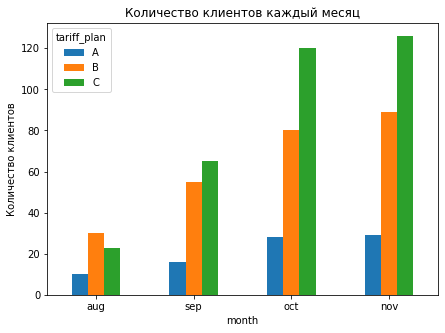

In [26]:
prep = clean_data.groupby(['month', 'tariff_plan']).agg({'user_id':'nunique'}).reset_index().set_index('month')
f, ax = plt.subplots(figsize=(7, 5))
prep.pivot_table(index='month', columns='tariff_plan', values='user_id', aggfunc='sum').plot(kind='bar', ax=ax)
ax.set_title('Количество клиентов каждый месяц')
ax.set_xticklabels(['aug', 'sep', 'oct', 'nov'], rotation=0, fontsize=10)
ax.set_ylabel('Количество клиентов')
plt.show()

- больше всего клиентов и самый активный рост числа клиентов у тарифа С
- у тарифа А наименьшее число клиентов

#### 3.3 Продолжительность и количество звонков в месяц. <a name="sub_3_3"></a> 

Построим столбчатую диаграмму общей продолжительности и количества звонков для каждого тарифа в месяц.

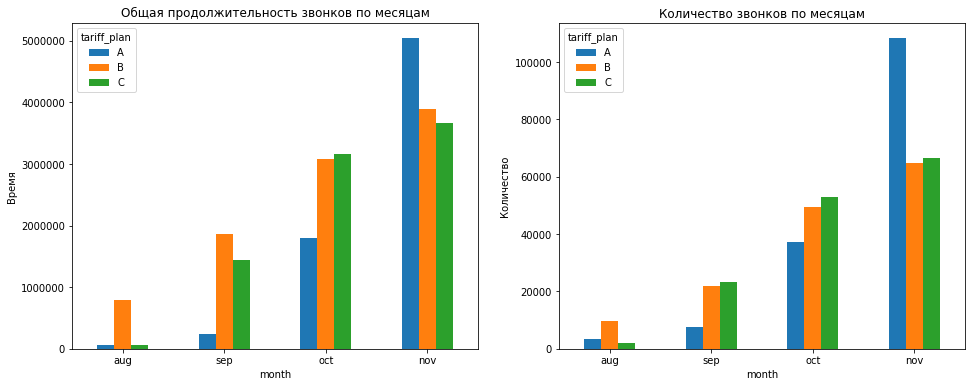

In [27]:
d_c = {'call_duration':0, 'calls_count':1}

f, ax = plt.subplots(1, 2, figsize=(16, 6))
for key,value in d_c.items():
    clean_data.pivot_table(index='month', columns='tariff_plan', values=key, aggfunc='sum').plot(kind='bar', ax=ax[value])
    ax[value].set_xticklabels(['aug', 'sep', 'oct', 'nov'], rotation=0, fontsize=10)
    if value == 0:
        ax[value].set_title('Общая продолжительность звонков по месяцам')
        ax[value].set_ylabel('Время')
    else:
        ax[value].set_title('Количество звонков по месяцам')
        ax[value].set_ylabel('Количество')

- Продолжительность и количество звонков для тарифов `С` и `B` практически одинаковое на протяжении 3х последних месяцев.
- Продолжительность и количество звонков для тарифа `A` только в ноябре превысило показатели других тарифов.

#### 3.4 Количество входящих и исходящих звонков в месяц. <a name="sub_3_4"></a> 

Построим столбчатую диаграмму входящих и исходящих звонков в месяц для каждого тарифа.

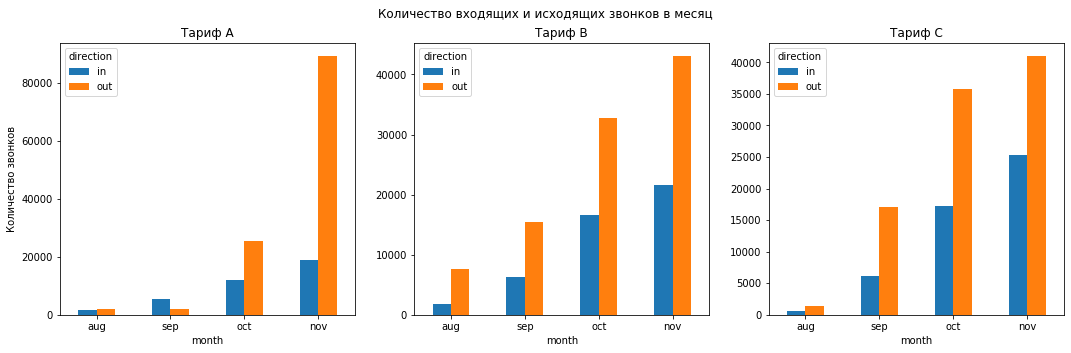

In [28]:
dic = {'A':0, 'B':1, 'C':2}

f, ax = plt.subplots(1, 3, figsize=(18, 5))
for key,value in dic.items():
    clean_data.query('tariff_plan==@key').pivot_table(index='month', columns='direction', values='calls_count', aggfunc='sum').plot(kind='bar', ax=ax[value])
    ax[value].set_title('Тариф '+ key)
    ax[value].set_xticklabels(['aug', 'sep', 'oct', 'nov'], rotation=0, fontsize=10)
ax[0].set_ylabel('Количество звонков')
plt.suptitle('Количество входящих и исходящих звонков в месяц')
plt.show()

- количество исходящих звонков для тарифов `С` и `B` больше количества входящих на всем промежутке времени примерно ~2 раза
- в ноябре резко вырастает количество исходящих звонков у тарифа `A`

#### 3.5 Количество внутренних и  внешних звонков.  <a name="sub_3_5"></a> 

Построим столбчатую диаграмму внутренних и внешних звонков в месяц для каждого тарифа.

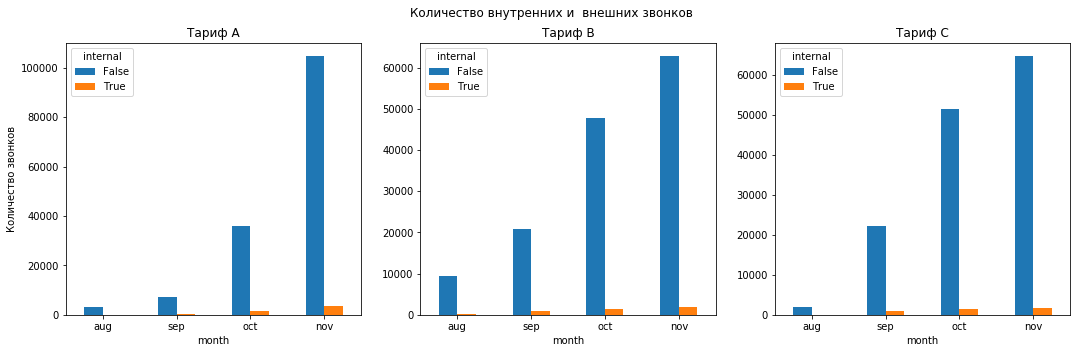

In [29]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
for key,value in dic.items():
        clean_data.query('tariff_plan==@key').pivot_table(index='month', columns='internal', values='calls_count', aggfunc='sum').plot(kind='bar', ax=ax[value])
        ax[value].set_title('Тариф '+ key)
        ax[value].set_xticklabels(['aug', 'sep', 'oct', 'nov'], rotation=0, fontsize=10)
ax[0].set_ylabel('Количество звонков')
plt.suptitle('Количество внутренних и  внешних звонков')
plt.show()

- количество внутренних звонков в десятки раз меньше по отношению к внешним звонкам.

#### 3.6 Количество пропущенных и отвеченных звонков в месяц. <a name="sub_3_6"></a> 

Построим столбчатую диаграмму количество пропущенных и отвеченных звонков в месяц

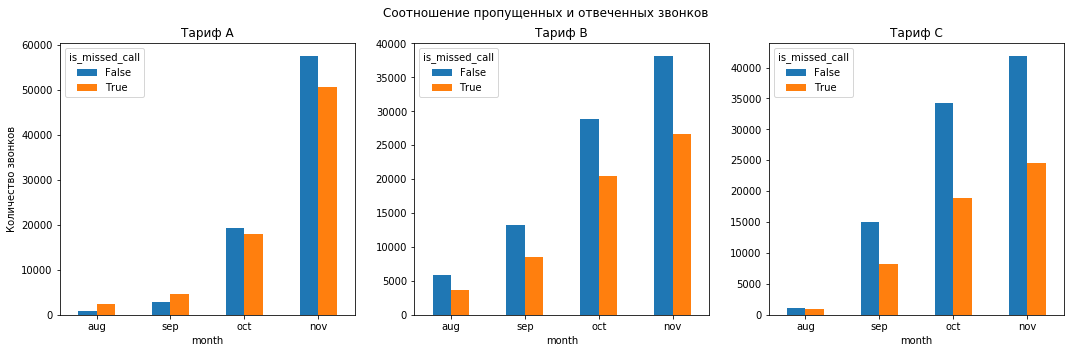

In [30]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
for key,value in dic.items():
    clean_data.query('tariff_plan== @key').pivot_table(index='month', columns='is_missed_call', values='calls_count', aggfunc='sum').plot(kind='bar', ax=ax[value])
    ax[value].set_title('Тариф '+ key)
    ax[value].set_xticklabels(['aug', 'sep', 'oct', 'nov'], rotation=0, fontsize=10)
ax[0].set_ylabel('Количество звонков')    
plt.suptitle('Соотношение пропущенных и отвеченных звонков')
plt.show()

- для тарифа `A` количество пропущенных и отвеченных звонков в месяц пратически одинковое, только к ноябрю вырисовывается небольшое отличие
- у тарифов `C` и `B` пропущенных звонков стабильно меньше на всем протяжении времени.

#### 3.7 Средняя продолжительность звонка в день. <a name="sub_3_7"></a> 

Рассчитаем среднюю продолжительность звонка в день для каждого тарифа. Не будем учитывать пропущенные звонки.

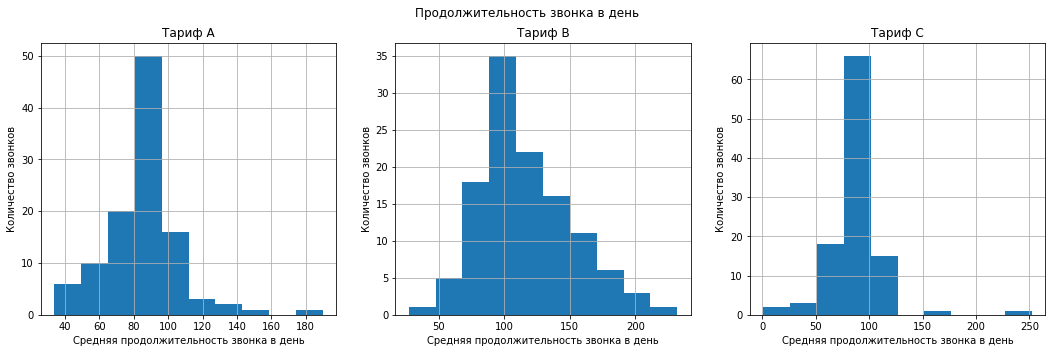

In [31]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
for key,value in dic.items():
    mean_call = clean_data.query('(is_missed_call == False) & tariff_plan == @key').groupby('date')[['call_duration', 'calls_count']].sum()
    mean_call['mean'] = mean_call['call_duration'] / mean_call['calls_count']
    mean_call['mean'].hist(ax=ax[value])
    ax[value].set_title('Тариф ' + key)
    ax[value].set_xlabel('Средняя продолжительность звонка в день')
    ax[value].set_ylabel('Количество звонков')
plt.suptitle('Продолжительность звонка в день')    
plt.show()

- для тарифов `A` и `C` среднее время звонка 90 секунд.
- для тарифа `В` среднее время звонка 100 секунд.

#### 3.8 Количество звонков вдень. <a name="sub_3_8"></a> 

Рассчитаем количество звонков в день для каждого тарифа. Не будем учитывать пропущенные звонки.

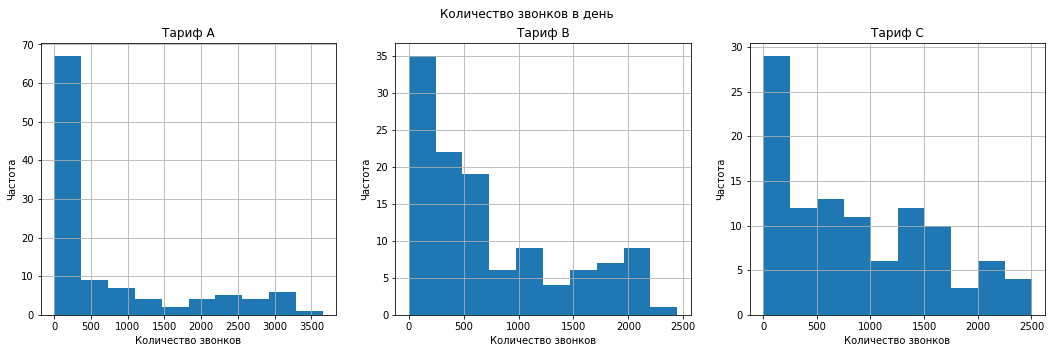

In [32]:
f, ax = plt.subplots(1, 3, figsize=(18, 5))
for key,value in dic.items():
    mean_call = clean_data.query('(is_missed_call == False) & tariff_plan == @key').groupby('date')[['call_duration', 'calls_count']].sum()
    mean_call['calls_count'].hist(ax=ax[value])
    ax[value].set_title('Тариф ' + key)
    ax[value].set_xlabel('Количество звонков')
    ax[value].set_ylabel('Частота')
plt.suptitle('Количество звонков в день')    
plt.show()

- в основном до 500 звонков в день для каждого тарифа.
- для тарифа `A` диапазон звонков в день от 0 до 3500
- для тарифов `C` и `B` диапазон звонков в день от 0 до 2500

### ШАГ 4. Поиск клиентов, которые переплачивают. <a name="4"></a>

#### 4.1 Внутренние звонки. <a name="sub_4_1"></a> 

У всех тарифов лимит на бесплатные внутренние вызовы 2000 минут. Посмотрим есть ли клиенты, которые превысили этот лимит.

In [33]:
internal_out_calls = np.ceil((clean_data
                      .query('(direction == "out") & (internal == True) & (is_missed_call==False)')
                     .pivot_table(index='user_id', columns='month', values='call_duration', aggfunc='sum') / 60))
(internal_out_calls > 2000).sum()

month
2019-08-01    0
2019-09-01    0
2019-10-01    0
2019-11-01    0
dtype: int64

Ни в одном из месяцев нет превышения бесплатного лимита.  Посмотрим рапределение на гистограмме.

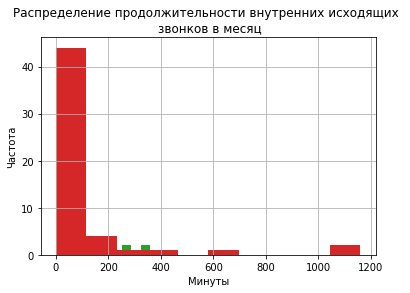

In [34]:
for column in internal_out_calls.columns:
    internal_out_calls[column].hist()
    plt.title('Распределение продолжительности внутренних исходящих \n звонков в месяц')
    plt.xlabel('Минуты')
    plt.ylabel('Частота')

Как видим большая часть внутренних разговоров в месяц лежит до 100 минут. Только один клиент наговорил до 1200 минут, что тоже достаточно далеко до платной тарификации.

#### 4.2 Расчет выгодных лимитов для тарифов. <a name="sub_4_2"></a> 

Рассчитаем лимит количество минут для тарифа С, превысив который выгоднее будет пользоваться тарифом В.   
Тоже самое сделаем для тарифа В и А.

Так как стоимость операторов для каждого тарифа одинаковая и никто из клиентов не преодолел платного лимита на внутреннюю тарификацию, расчет будем производить используя только стоимость абонентской платы и стомость минуты исходящего звонка.

In [35]:
#запишем тарифные опции для каждого тарифа
b_minutue = 0.5
b_base = 2000

a_minutue = 0.4
a_base = 5000

c_minutue = 0.7
c_base = 1000

#в цикле запишем формулу расчета расходов: количество минут * на стоимость минут + аб. плата
#когда стоимость расходов для тарифа С будет больше, чем для В, 
#значит мы определили количество минут, когда выгоднее перейти на другой тариф

for element in range(0, 5002, 1):
    c = element * c_minutue + c_base
    b = element * b_minutue + b_base
    if c > b:
        print(element)

for element in range(0, 30002, 1):
    a = element * a_minutue + a_base
    b = element * b_minutue + b_base
    if b>a:
        print(element)          

5001
30001


Мы получили, что: 
- тарифом C выгоднее пользоваться, если общая продолжительность исходящих звонков до 5000 минут в месяц.
    - `0 < c < 5000`
- тарифом В выгоднее пользоваться, если общая продолжительность исходящих звонков от 5000 минут до 30000 минут в месяц
    - `5000 < b < 30000`
- тарифом А выгоднее пользоваться, если общая продолжительность исходящих звонков от 30000 минут в месяц.
    - `a > 30000`

Внутренняя тарификация тут не учитывается, т.к никто из клиентов не превысил бесплатный лимит за все время пользования.

Рассчитаем для каждого пользователя количество исходящих минут, которые он наговорил каждый месяц.

In [36]:
external_calls = np.ceil((clean_data
                .query('(internal == False) & (direction == "out") & (is_missed_call == False)')
                .pivot_table(index='user_id', columns='month', values='call_duration', aggfunc='sum')) / 60)    
external_calls = external_calls.merge(clients[['user_id', 'tariff_plan']], on='user_id', how='left')  
external_calls.head(3)

,user_id,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,tariff_plan
0,166377,1083.0,1463.0,1408.0,1222.0,B
1,166405,786.0,1862.0,4682.0,4950.0,B
2,166406,1962.0,1400.0,1146.0,514.0,B


Отдельно выделим данные каждого тарифа. Пропущенные значения значат, что клиент не сделал ни одного исходящего звонка в этом месяце либо он зарегистрировался только в следующем месяце. Заменим пропущеннные значения на 0 для удобства будущих расчетов.

In [37]:
users_c = external_calls.query('tariff_plan == "C"').set_index(['user_id', 'tariff_plan']).fillna(0)
users_b = external_calls.query('tariff_plan == "B"').set_index(['user_id', 'tariff_plan']).fillna(0)
users_a = external_calls.query('tariff_plan == "A"').set_index(['user_id', 'tariff_plan']).fillna(0)

####  4.3 Проверка клиентов тарифа С на переплату. <a name="sub_4_3"></a> 

Посмотрим, много ли клиетов тарифа С превысило лимит, после которого им выгоднее было бы пользоваться тарифом В.

In [38]:
users_c[users_c > 5000].dropna(how='all')

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,


Ни один из клиетов тарифа С не нуждается в смене тарифа.

####  4.4 Проверка клиентов тарифа B на переплату. <a name="sub_4_4"></a> 

Посмотрим сколько клиентов тарифа В превысило лимит и их необходимо перевести на более дорогой тариф А.

In [39]:
users_b[users_b > 30000].dropna(how='all' )

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,


Ни один из клиентов не превысил лимита для перевода на более дорогой тариф A. Посмотрим, возможно есть клиенты которых нужно перевести на более дешевый тариф С.

In [40]:
users_b[users_b < 5000].dropna()

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,
166377,B,1083.0,1463.0,1408.0,1222.0
166405,B,786.0,1862.0,4682.0,4950.0
166406,B,1962.0,1400.0,1146.0,514.0
166485,B,58.0,1921.0,1311.0,2493.0
166495,B,1155.0,673.0,337.0,387.0
...,...,...,...,...,...
168180,B,0.0,0.0,0.0,17.0
168225,B,0.0,0.0,0.0,23.0
168307,B,0.0,0.0,30.0,0.0


69 клиентов тарифа В необходимо перевести на тариф С. Посмотрим сколько же клиентов пользуются подходящим для них тарифом В.

In [41]:
users_b[users_b > 5000].dropna(how='all' )

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,
166658,B,NaN,10018.0,9440.0,7869.0


Только 1 клиент из 70 пользуется подходящим им тарифом В. 

#### 4.5 Проверка клиентов тарифа А на переплату. <a name="sub_4_5"></a> 

Посмотрим сколько клиентов пользуются подходящим для них тарифом А.

In [42]:
users_a[users_a > 30000].dropna(how='all' )

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,


Ни один из клиентов не превысил лимит. Пользование тарифа А невыгодно для всех пользователей. Посмотрим, сколько клиентов необходимо перевести на тариф В.

In [43]:
users_a[(users_a > 5000) & (users_a < 30000)].dropna(how='all' )

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,
168062,A,NaN,NaN,NaN,8721.0
168187,A,NaN,NaN,NaN,5933.0
168252,A,NaN,NaN,NaN,7643.0
168361,A,NaN,NaN,7137.0,25371.0


Четверых клиентов необходимо перевести на тариф В. Остальных клиентов нужно перевести на тариф С.

In [44]:
users_a[users_a < 5000].dropna()

,,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00
user_id,tariff_plan,,,,
166407,A,1.0,35.0,176.0,108.0
166541,A,0.0,44.0,52.0,117.0
166582,A,396.0,162.0,612.0,1049.0
166609,A,113.0,1.0,0.0,0.0
166713,A,0.0,0.0,2.0,3.0
166725,A,26.0,154.0,477.0,310.0
166843,A,11.0,77.0,194.0,55.0
166901,A,7.0,28.0,37.0,109.0
166916,A,0.0,211.0,1254.0,1196.0


25 клиентов тарифа А переплачивают за услуги: 4 клиентов необходимо перевести на тариф В, 21 клиента на тариф С.

#### 4.6 Распределение продолжительности исходящих звонков в месяц <a name="sub_4_6"></a> 

Построим гистограмму продолжительности исходящих звонков в месяц.

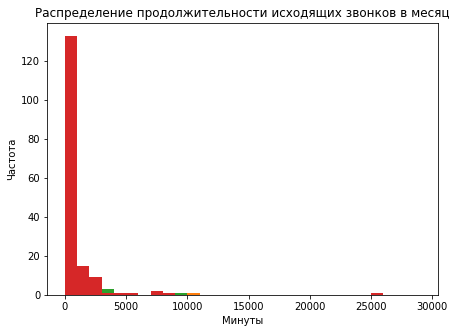

In [45]:
graf = external_calls.set_index(['user_id', 'tariff_plan'])
graf.columns = ['aug', 'sep', 'oct', 'nov']

f, ax = plt.subplots(figsize=(7, 5))
for column in graf.columns:   
    plt.hist(graf[column], bins=(range(0,30000,1000)))
    ax.set_title('Распределение продолжительности исходящих звонков в месяц')
    ax.set_xlabel('Минуты')
    ax.set_ylabel('Частота')
plt.show()

- У большей части клиентов всех тарифов в месяц продолжительность исходящих вызовов до 1000. 
- Практически все клиенты попадают под тариф `C` с лимитом в 5000 минут. Есть только 5 клиентов, наговоривших более 5000 минут.
- Ни одному клиенту не выгодно использование тарифа `A` 


### Вывод <a name="5"></a>

В ходе исследовательского анализа данных мы выяснили:
- ##### Количество активных клиентов сервиса
	- из **732** клиентов, зарегистрированных в сервисе, только **307** клиентов проявили какую-либо активность.
	- из **307** клиентов к последнему месяцу осталось только **261**
	- из **261** клиентов только **244** совершили больше 4 звонков или  наговорили больше 13 секунд за месяц.
- ##### Количество клиентов разных тарифов в месяц
	- больше всего клиентов и самый активный рост числа клиентов у тарифа **С**
	- у тарифа **А** наименьшее число клиентов
- ##### Продолжительность и количество звонков в месяц
	- для тарифов **С** и **B** практически одинаковое на протяжении трех последних месяцев
	- для тарифа **A** только в ноябре превысило показатели других тарифов
- ##### Количество входящих звонков и исходящих звонков в месяц
	- количество исходящих звонков для тарифов **С** и **B** больше количества входящих на всем промежутке времени примерно ~2 раза
	- в ноябре резко вырастает количество исходящих звонков у тарифа **A**
- ##### Количество внутренних и внешних звонков
	- количество внутренних звонков в десятки раз меньше по отношению к внешним звонкам
- ##### Количество пропущенных и отвеченных звонков в месяц
	- для тарифа **A** количество пропущенных и отвеченных звонков в месяц пратически одинковое, только к ноябрю вырисовывается небольшое отличие
	- у тарифов **C** и **B** пропущенных звонков стабильно меньше на всем протяжении времени
- ##### Средняя продолжительность звонка в день
	- для тарифов **A** и **C** среднее время звонка 90 секунд
	- для тарифа **В** среднее время звонка 100 секунд
- ##### Количество звонков вдень
	- в основном до 500 звонков в день для каждого тарифа
	- для тарифа **A** диапазон звонков в день от 0 до 3500
	- для тарифов **C** и **B** диапазон звонков в день от 0 до 2500
    
Проанализировав внутренние и внешние исходящие звонки, мы выяснили следующие:
- ни один из клиентов не превысил бесплатного лимита 2000 минут в месяц на внутренние вызовы
- большая часть клиентов в месяц совершают до 100 минут исходящих внутренних вызовов.
- 66 клиентов из 244 не совершили ни одного исходящего вызова за все время.
- тарифом **C** выгоднее пользоваться, если общая продолжительность исходящих звонков до 5000 минут в месяц.
- тарифом **B** выгоднее пользоваться, если общая продолжительность исходящих звонков от 5000 минут до 30000 минут в месяц
- тарифом **A** выгоднее пользоваться, если общая продолжительность исходящих звонков от 30000 минут в месяц.
- Нашли клиентов, которые переплачивают для каждого тарифа:
	- Для тарифа **C**:
		- нет ни одного клиента, которого необходимо перевести на другой тариф
	- Для тарифа **B**:
		- нет ни одного клиента, которого необходимо перевести на более дорогой тариф
		- 69 клиентов необходимо перевести на более дешевый тариф **C**
		- только 1 клиент потребляет услуг компании согласно своему тарифу
	- Для тарифа **A**:
		- ни одному из клиентов не выгодно использование текущего тарифного плана
		- 4 клиентов необходимо перевести на тариф **B**
		- 21 клиента необходимо перевести на тариф **C**    
- большая часть клиентов в месяц совершают до 1000 минут исходящих внешних вызовов.
- 97% клиентов укладываются в лимит тарифа **C** 5000 минут в месяц.

Исходя из данные выше, можно сделать вывод, что текущие тарифы не соответствуют потребностям клиентов. Практически все клиенты тарифа **A** и **B** переплачивают при текущей стоимости минуты разговора и абонентской платы. Для минимизации риска оттока клиентов необходимо изменить линейку тарифных планов, адаптировав ее под количество потребляемых услуг клиентами.